In [45]:
import numpy as np # libreria de herramientas matematicas y de álgebra lineal
import matplotlib.pyplot as plt #Librería para gráficas

# Curso Machine Learning 2020-I 
## Laboratorio 1: Regresión Lineal (máxima verosimilitud/mínimos cuadrados)

### Generación de data
El siguiente bloque define dos sistemas con ruido. En cada caso, el parámetro sigma controla el nivel ruido.

In [46]:
def sistema1(x,sigma = 2):
  a = 0.5
  b = 1
  y = a*x + b
  e = sigma*np.random.randn(y.shape[0],y.shape[1])
  t = y + e
  return t
def sistema2(x,sigma = 0.05):
  a = 0.001
  b = 1
  y = a*pow(x,3)+b
  e = sigma*np.random.randn(y.shape[0],y.shape[1])
  t = y + e
  return t
def sistema3(x,sigma=2):
  a = 0.001
  b = 0.01 
  c = 0.1
  d = 5
#  y = a*np.sin(x)/x
  y = a*x**3 + b*x**2 + c*x + d
  e = sigma*np.random.randn(y.shape[0],y.shape[1])
  t = y + e
  return t,y


El siguiente bloque define un arreglo uniformemente distribuido de valores (x) y calcula la salida del sistema uno (t) para cada valor 

(100, 1) (100, 1)
Number of samples: 100


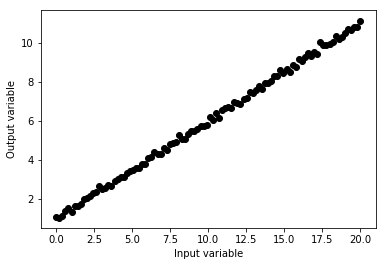

In [47]:
N = 100 # número de muestras a generar
x_init = 0
x_end = 20
x = np.linspace(x_init,x_end,N)[:,None] #datos de entrada, me genera un vector de números de tamaño de N con valores consecutivos entre x_init y x_end

t = sistema1(x,sigma=0.1)
print(x.shape,t.shape)
print('Number of samples:',t.shape[0])

plt.scatter(x, t,  color='black')
plt.xlabel('Input variable')
plt.ylabel('Output variable')
plt.show()

**A.** Use el modelo de regresión lineal descrito en clase para construir $f(x)=w_1x+w_0$. El resultado de la regresión se debe guardar en la variable $y$ para graficar. ¿Su regresion se ajusta bien a sus datos? Justifique su respuesta

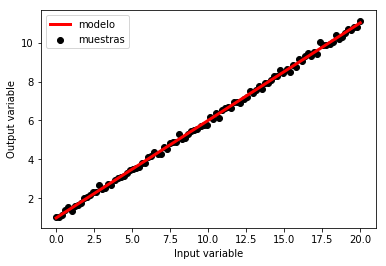

In [48]:
#%% least squares's code  for predicted y
### Define values

# using x values from before cell - Training Data

# Using t values from before cell -> Salida esperada

## Create Phi value
unos = np.ones(x.shape) #Add a variable of ones for the bias
Phi=np.concatenate((unos,x),axis=1) 
# print('Input size:',Phi.shape)


## Creating 'w' value from verosimilitud
w=np.dot(np.dot(np.linalg.inv(np.dot(Phi.T,Phi)),Phi.T), t)

## Obtaining 'y' value, salida obtenida pro el modelo de regresión (salida estimiada, aproximada)
y=np.dot(Phi,w)


#%%
# Make plot
plt.scatter(x, t,  color='black')
plt.plot(x, y, color='red', linewidth=3)
plt.xlabel('Input variable')
plt.ylabel('Output variable')
plt.legend(('modelo','muestras'))
plt.show()

**B.** Consulte cómo usar el regresor lineal implementado en scikit (LinearRegression en linear_model) y aplíquelo para el problema de regresión anterior. El resultado de la regresión se debe guardar en la variable $z$ para graficar. Compare los resultados de su implementación y del toolbox scikit. ¿Son iguales o no? ¿Por qué?

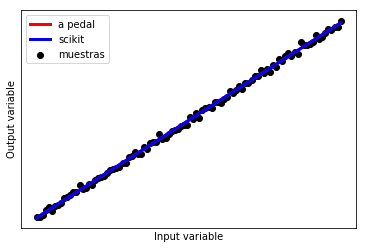

In [49]:
#%% regression with sklearn's librery 
# Import LinearRegression from scikit learn
from sklearn.linear_model import LinearRegression

# Using x values from before cell - Training Data

# Using t values from before cell -> Salida esperada

# Using Phi value from before cell

# Using w value from before cell

# Using y from before cell

## Calculate model values (z) with scikit learn

# Create linearRegression object with Training 'x' data and 't' target data
# X -> training values, t -> target values
lin_model = LinearRegression().fit(x, t)

# Create
z=lin_model.predict(x)

# Plot outputs
plt.scatter(x, t,  color='black')
plt.plot(x, y, color='red', linewidth=3)
plt.plot(x, z, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.xlabel('Input variable')
plt.ylabel('Output variable')

plt.legend(('a pedal','scikit','muestras'))
plt.show()
#https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

**C.** El siguiente bloque define un arreglo uniformemente distribuido de valores (x) y calcula la salida del sistema dos (t) para cada valor. ¿Considera que construir un regresor de la misma forma que para el sistema 1 ajustaría bien las muestras? ¿Por qué?

X: (200, 1) t: (200, 1)


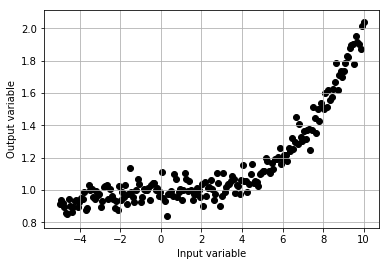

In [50]:
# Overwrite 'x' training data
x = np.linspace(-5,10,200).reshape(-1,1)

# Overwrite 't' Target data with system or model 2
t = sistema2(x)
print('X:',x.shape,'t:',t.shape)
plt.scatter(x,t,color='black')
plt.xlabel('Input variable')
plt.ylabel('Output variable')
plt.grid(True)
plt.show()

**D.** Aplique el regresor lineal de scikit para ajustar los datos del sistema dos usando como función base $\phi(x)=x$. El resultado de la regresión se debe guardar en la variable y_lineal para graficar. Compare los resultados de su implementación y del toolbox scikit. ¿Su regresion se ajusta bien a sus datos? Justifique su respuesta

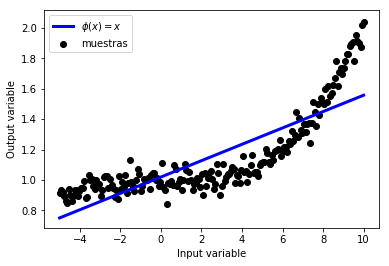

In [51]:
#%% your code

## Using 'x' training data from before cell

## Using 't' target data from before cell - system 2

# Using skit learn

# Create LinearRegression object with 'x' training data and 't' target data
# X -> training values, t -> target values
lin_model = LinearRegression().fit(x, t)

# Get y value sor "function" with scikit learn
y_lineal=lin_model.predict(x)


#%%
plt.scatter(x, t,  color='black')
plt.plot(x, y_lineal, color='blue', linewidth=3)
plt.xlabel('Input variable')
plt.ylabel('Output variable')
plt.legend(('$\phi(x)=x$','muestras'))
plt.show()

**E.** Consulte cómo usar características polinomiales como funciones base $\phi(x)=\{x^n:n=0...P\}$,$\phi(x)\in\mathbb{R}^{P+1}$ (LinearRegression en sklearn.preprocessing) y aplíquelas para el problema de regresión anterior. Las características polinomiales se deben guardar en la variabale Phi. El resultado de la regresión se debe guardar en la variable *y_poly* para graficar. ¿Mejora o no el resultado de la regresión? ¿Por qué? ¿Cómo afecta el grado del polinomio ($P$) el resultado de la regresión?

X: (200, 1) Polinomial: (200, 4)


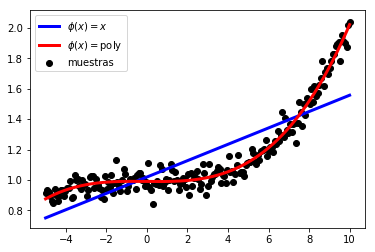

In [52]:
#%% your code
# Import scikit learn function for Polynom
from sklearn.preprocessing import PolynomialFeatures

# Get Phi for traning data with Polynomial features
Phi = PolynomialFeatures(degree=3).fit_transform(x)

## Using 't' target data from before cell - system 2

# Using Phi how Training data on LinearRegression
reg= LinearRegression().fit(Phi, t)

y_poly = reg.predict(Phi)



#%%
print('X:',x.shape,'Polinomial:',Phi.shape)

plt.scatter(x, t,  color='black')
plt.plot(x, y_lineal, color='blue', linewidth=3)
plt.plot(x, y_poly, color='red', linewidth=3)
plt.legend(('$\phi(x)=x$','$\phi(x)=$poly','muestras'))
plt.show()

El siguiente bloque muestra la transformación que hacen las características polinomiales a la variable de entrada $x$.

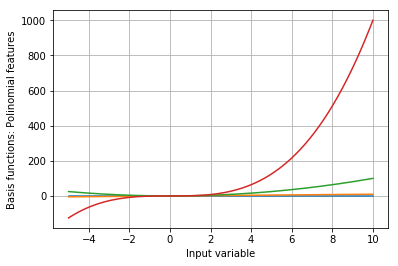

In [53]:
plt.plot(x, Phi)
plt.xlabel('Input variable')
plt.ylabel('Basis functions: Polinomial features')
plt.grid()
plt.show()

**F.** Consulte cómo usar funciones de base radial (RBF) como funciones base  $\phi_p(x)=\exp(-(x-\mu_p)^2/(2\sigma^2))$ (RBF en sklearn.gaussian_process.kernels) y aplíquelas para el problema de regresión anterior. Los centroides se seben guardar en la variable mu; El resultado de la RBF se debe guardar en la variable Phi; El resultado de la regresión se debe guardar en la variable y_rbf para graficar. ¿Cómo afecta la cantidad de centroides el resultado de la regresión? ¿Cómo afecta el parámetro escala ($\sigma$) el resultado de la regresión?  ¿Escogería funciones polinomiales o funciones de base radial (RBF) para este modelo de regresión? Justifique su respuesta.

X: (200, 1) mu: (15, 1) Phi: (200, 15)


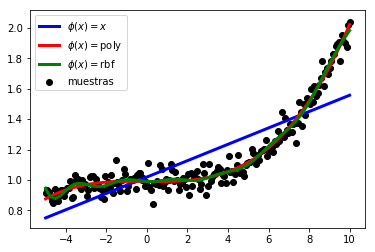

In [55]:
#%% your code
# Radial-basis function kernel (aka squared-exponential kernel).
from sklearn.gaussian_process.kernels import RBF

rbf = RBF()
# [:,None] represent transpose
mu=np.linspace(-5,10,15)[:,None]

Phi=rbf(x, mu)

## Using 't' target data from before cell - system 2

reg=LinearRegression().fit(Phi, t)

y_rbf = reg.predict(Phi)


print('X:',x.shape,'mu:',mu.shape,'Phi:',Phi.shape)

plt.scatter(x, t,  color='black')
plt.plot(x, y_lineal, color='blue', linewidth=3)
plt.plot(x, y_poly, color='red', linewidth=3)
plt.plot(x, y_rbf, color='green', linewidth=3)
plt.legend(('$\phi(x)=x$','$\phi(x)=$poly','$\phi(x)=$rbf','muestras'))
plt.show()

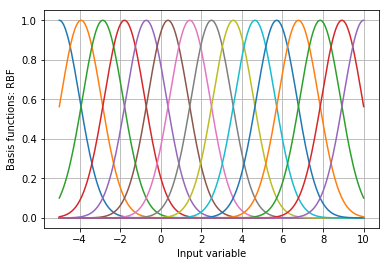

In [37]:
plt.plot(x, Phi)
plt.xlabel('Input variable')
plt.ylabel('Basis functions: RBF')
plt.grid()
plt.show()

**G.** En el siguiente bloque se crean los datos del sistema3. Deben de aplicar una regresión lineal usando bases polinomiales, usen $M\in\{1,5,10,15,20,25\}$. Entranen los diferentes modelos con las variables $x$ y $y$, y estimen las salidas para X_test y guarden esta como $t$_$test$, para cada caso viasualicen el modelo estimado, el modelo real y las muestras utilizadas para el entrenamiento. ¿Qué podemos decir a medida que M crece?. Entre mayor número de bases, ¿mejora la regresión?. Investiga sobre este fenomeno.
¿Existe una forma de solucionarlo? ¿Cómo?.



(10, 1) (10, 1)
Number of samples: 10


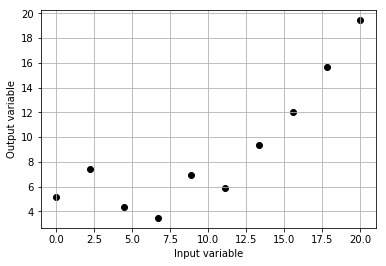

In [38]:
N = 10 # número de muestras a generar
x_init = 0
x_end = 20
x = np.linspace(x_init,x_end,N)[:,None] #datos de entrada, me genera un vector de números de tamaño de N con valores consecutivos entre x_init y x_end

t,y_real = sistema3(x,sigma=1)
print(x.shape,t.shape)
print('Number of samples:',t.shape[0])

plt.scatter(x, t,  color='black')
plt.xlabel('Input variable')
plt.ylabel('Output variable')
plt.grid(True)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (100, 1) and (10, 1)

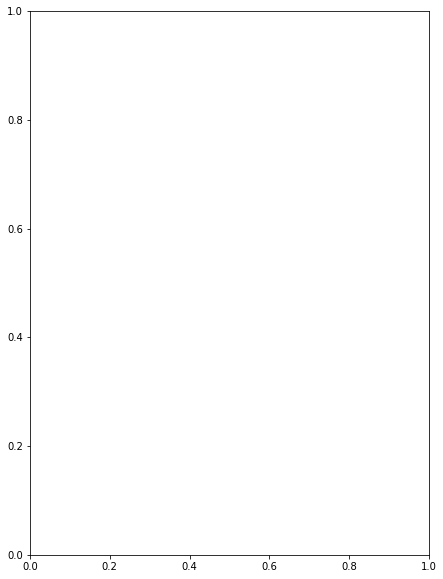

In [56]:

degrees = [1, 5, 10, 15, 20, 25]


X_test = np.linspace(x_init, x_end, 100)[:,None]
t,y_real = sistema3(X_test,sigma=1)
plt.figure(figsize=(50, 10))
for enum, degree in enumerate(degrees):
    ax = plt.subplot(1, len(degrees), enum + 1)
    #%% Your code
    # Get Phi for traning data with Polynomial features
    Phi = PolynomialFeatures(degree=degree).fit_transform(X_test)

    ## Using 't' target data from before cell - system 2

    # Using Phi how Training data on LinearRegression
    reg= LinearRegression().fit(Phi, t)

    y_poly = reg.predict(Phi)



    #%%
    plt.plot(X_test, t_test, label="Model")
    plt.plot(X_test, y_real, label="True function")
    plt.scatter(x, t, edgecolor='b', s=20, label="Samples")
    plt.legend(loc="best")
    plt.title("M = {}".format(degrees[enum]))
    plt.xlabel('Input variable')
    plt.ylabel('Output variable')
    plt.grid(True)
plt.show()



**H.** Realizar de nuevo el inciso anterior pero utilizando una regularización de Lasso y Ridge. ¿Qué diferencia hay con los resultados anteriores? ¿Cómo afecta el parámetro de regularización el resultado de la regresión? 